In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('ggplot')
import cPickle as pk
import pandas as pd
import networkx as nx
from itertools import combinations
from collections import Counter
from IPython.display import clear_output
import seaborn as sns
import numpy as np

## Importing
[to top](#Table-of-Contents) 

In [2]:
pwd

u'/Users/innovation-sfi/Dropbox/Research/Innovation/EPO/Data_processing/Python'

In [5]:
df = pk.load(open('pickles_and_munged_csv/pre1950_1990_overlaps.pk', 'rb')); df

,AT,AU,BE,CA,CH,DE,DK,ES,FI,FR,...,GR,IE,IS,IT,JP,LU,NL,NO,SE,US
AT,1.000000,0.236459,0.124884,0.354078,0.569972,0.726078,0.045676,0.138701,0.084130,0.762550,...,0.001684,0.022733,0.000231,0.358338,0.481197,0.120426,0.087840,0.041867,0.010513,0.851083
AU,0.432573,1.000000,0.194103,0.489125,0.612599,0.730435,0.068977,0.197104,0.108793,0.781287,...,0.003061,0.036070,0.000564,0.440428,0.425887,0.168023,0.139304,0.057881,0.014903,0.893845
BE,0.342792,0.291240,1.000000,0.392742,0.644728,0.747016,0.072583,0.165896,0.121959,0.840147,...,0.003505,0.028405,0.000544,0.425468,0.487444,0.180673,0.246578,0.066751,0.017375,0.862297
CA,0.341375,0.257780,0.137949,1.000000,0.543634,0.705305,0.039325,0.125828,0.081844,0.761081,...,0.001666,0.019551,0.000371,0.411384,0.413072,0.120075,0.118939,0.041373,0.010444,0.890793
CH,0.136458,0.080171,0.056234,0.134995,1.000000,0.619560,0.016083,0.046432,0.031098,0.700392,...,0.000606,0.006220,0.000090,0.217860,0.378479,0.065535,0.048952,0.014146,0.003421,0.811712
DE,0.069622,0.038286,0.026096,0.070147,0.248143,1.000000,0.007972,0.023133,0.017124,0.625799,...,0.000295,0.002688,0.000050,0.124837,0.532132,0.034006,0.024107,0.007724,0.001751,0.823919
DK,0.404071,0.333561,0.233931,0.360830,0.594273,0.735489,1.000000,0.251656,0.190203,0.763829,...,0.007012,0.065933,0.001656,0.435625,0.656019,0.153779,0.188157,0.117355,0.033307,0.856739
ES,0.407129,0.316261,0.177406,0.383087,0.569282,0.708137,0.083500,1.000000,0.119886,0.760486,...,0.004201,0.043786,0.000840,0.478091,0.476152,0.178795,0.126478,0.069023,0.017224,0.840012
FI,0.336400,0.237795,0.177664,0.339437,0.519391,0.714091,0.085971,0.163314,1.000000,0.736893,...,0.002905,0.033807,0.000924,0.370031,0.579742,0.152749,0.131531,0.107012,0.028305,0.858080
FR,0.056548,0.031670,0.022698,0.058539,0.216942,0.483970,0.006403,0.019213,0.013666,1.000000,...,0.000232,0.002261,0.000049,0.109163,0.412736,0.046707,0.021076,0.006173,0.001415,0.834739


# Plotting

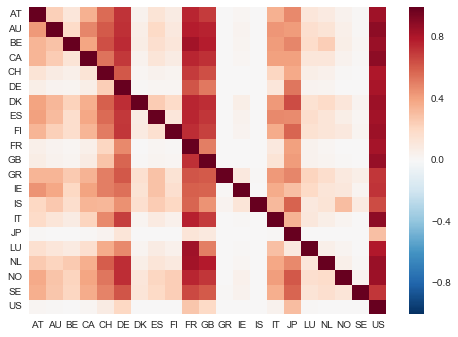

In [10]:
sns.heatmap(df, vmin=-1, vmax=1, )

Clearly size is the main factor. The most interesting thing spotted so far is the difference in JP and US. Both are similarly sized, and much bigger than all the others. US contains most of the other nets except for JP. And JP, though very large, doesn't well contain the other nets. 
Points that JP is fundamentally different to the others. 
Interested to see KR and CN.

# Animation

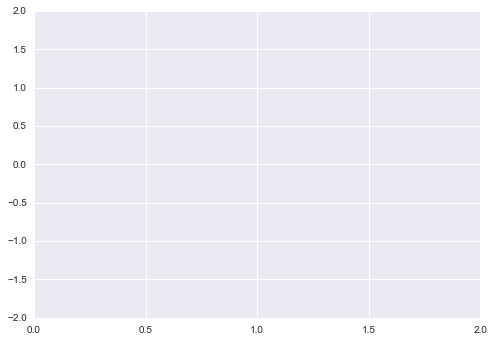

In [43]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
plt.show()

In [50]:
fig = plt.figure()

def init():
    #sns.heatmap(df.applymap(lambda x: 0))

def animate(i):
    plt.clf()
    sns.heatmap(df.applymap(lambda x: x+i))

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10, interval=100)

IndentationError: expected an indented block (<ipython-input-50-4a78e3b70543>, line 6)

//anaconda/lib/python2.7/site-packages/matplotlib/animation.py:782: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


ValueError: Cannot save animation: no writers are available. Please install mencoder or ffmpeg to save animations.

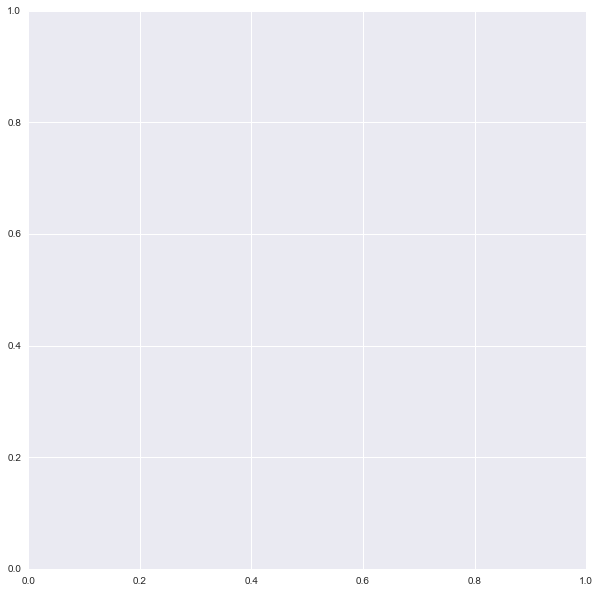

In [52]:
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
sns.set()

def updatefig(i):
  plt.clf()
  data = df.applymap(lambda x: x+i)
  sns.heatmap(data)

anim = animation.FuncAnimation(fig, updatefig, frames=10,interval=100)
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()

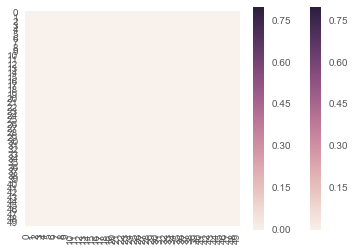

In [32]:
fig = plt.figure()

nx = 50
ny = 50

data = np.random.rand(nx, ny)
sns.heatmap(data, vmax=.8, square=True)



def init():
      sns.heatmap(np.zeros((nx, ny)), vmax=.8, square=True)

def animate(i):
    plt.clf()
    data = np.random.rand(nx, ny)
    sns.heatmap(data, vmax=.8, square=True)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, repeat = False)